# Chapter 2 - Essential Statistics for Data Assessment

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Classification of variable types: numerical and categorical

In [4]:
df = pd.read_excel("PopulationEstimates.xls",skiprows=2)
df.head(8)

,FIPS,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018
0,0,US,United States,NaN,NaN,NaN,NaN,NaN,308745538,308758105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,NaN,4779736,4780138,...,0.424031,1.171362,0.516888,1.234191,1.607294,0.619874,0.646064,0.817666,1.079070,1.856398
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,0.0,54571,54574,...,1.066088,0.666403,6.002073,-6.119262,-3.885124,1.971001,-1.859380,5.250727,1.029950,0.630381
3,1003,AL,Baldwin County,4.0,3.0,5.0,2.0,5.0,182265,182264,...,21.996950,24.298662,16.345147,17.638173,22.876199,20.239802,17.932091,21.484903,22.534622,24.846682
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,3.0,27457,27457,...,-25.501697,-9.072923,0.256035,-6.786002,-8.093425,-5.102231,-15.531931,-18.152860,-25.030896,-8.593297
5,1007,AL,Bibb County,1.0,1.0,1.0,1.0,0.0,22915,22920,...,-3.589550,-7.029251,-5.041759,-3.787629,-5.666224,1.065317,1.507660,-0.753246,-3.146396,-6.584362
6,1009,AL,Blount County,1.0,1.0,1.0,1.0,0.0,57322,57321,...,6.224858,-0.172910,0.243633,-1.633022,-0.295188,-1.980336,-1.286475,-1.025739,6.363573,-0.034582
7,1011,AL,Bullock County,6.0,6.0,6.0,6.0,3.0,10914,10911,...,-20.820159,-2.953628,-22.546973,-7.047547,-6.427829,9.521116,-24.590553,-3.079736,-21.014740,-3.150537


In [5]:
df.columns

Index(['FIPS', 'State', 'Area_Name', 'Rural-urban_Continuum Code_2003',
       'Rural-urban_Continuum Code_2013', 'Urban_Influence_Code_2003',
       'Urban_Influence_Code_2013', 'Economic_typology_2015',
       'CENSUS_2010_POP', 'ESTIMATES_BASE_2010',
       ...
       'R_DOMESTIC_MIG_2017', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2011',
       'R_NET_MIG_2012', 'R_NET_MIG_2013', 'R_NET_MIG_2014', 'R_NET_MIG_2015',
       'R_NET_MIG_2016', 'R_NET_MIG_2017', 'R_NET_MIG_2018'],
      dtype='object', length=149)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3273 entries, 0 to 3272
Columns: 149 entries, FIPS to R_NET_MIG_2018
dtypes: float64(135), int64(12), object(2)
memory usage: 3.7+ MB


Many datasets use integers to represent categorical variables. Treating them as numerical
values may result in serious consequences in terms of downstream tasks such as machine
learning, mainly because artificial distances between numerical values will be introduced.

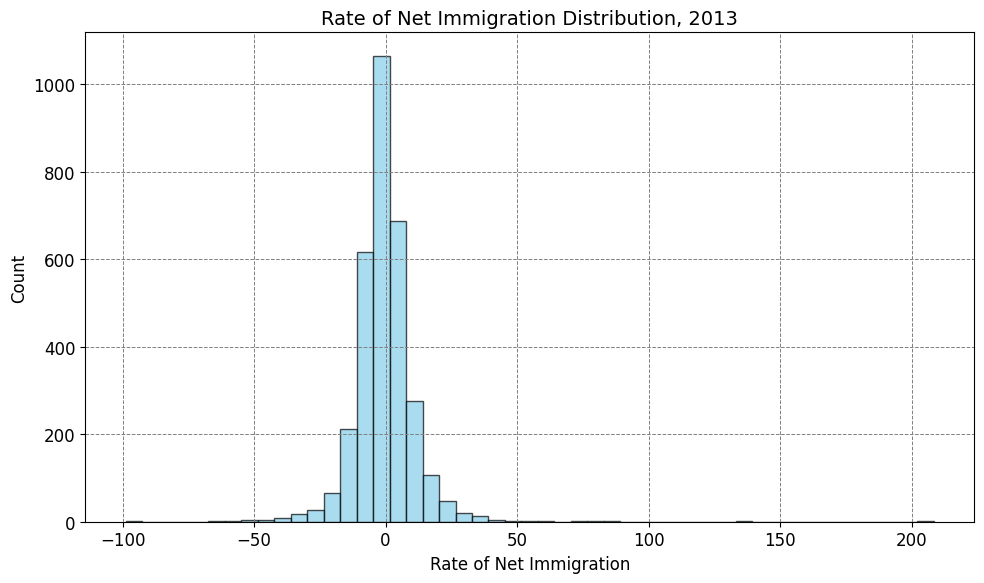

In [8]:
plt.figure(figsize=(10, 6))             # Set figure size to make the plot larger and easier to read
plt.rcParams.update({'font.size': 12})  # Update font size for better readability of labels, title, and ticks

# Plot a histogram for the column "R_NET_MIG_2013" of the DataFrame 'df'
plt.hist(df["R_NET_MIG_2013"], 
         bins=np.linspace(np.nanmin(df["R_NET_MIG_2013"]),  # Find the minimum non-NaN value in the column for binning
                          np.nanmax(df["R_NET_MIG_2013"]),  # Find the maximum non-NaN value in the column for binning
                          num=50),                          # Specify the number of bins to be 50
         color='skyblue',                                   # Set the color of the bars to sky blue
         edgecolor='black',                                 # Set the color of the edges of the bars to black for better visibility
         alpha=0.7)                                         # Set the transparency of the bars to 70% to make them slightly see-through

plt.title("Rate of Net Immigration Distribution, 2013", fontsize=14) # Set the title of the histogram
plt.xlabel("Rate of Net Immigration")                                # Label for x-axis
plt.ylabel("Count")                                                  # Label for y-axis

plt.grid(visible=True, linestyle='--', linewidth=0.7, color='grey')  # Add grid lines to improve readability of the plot
plt.tight_layout()                                                   # Adjust the layout to prevent overlap of elements
plt.show()                                                           # Display the histogram

`nanmin` is a function from the NumPy library (numpy) that returns the minimum value in an array, ignoring any NaN (Not a Number) values.

## Numerical variable: Mean, Median and Mode

## Mean

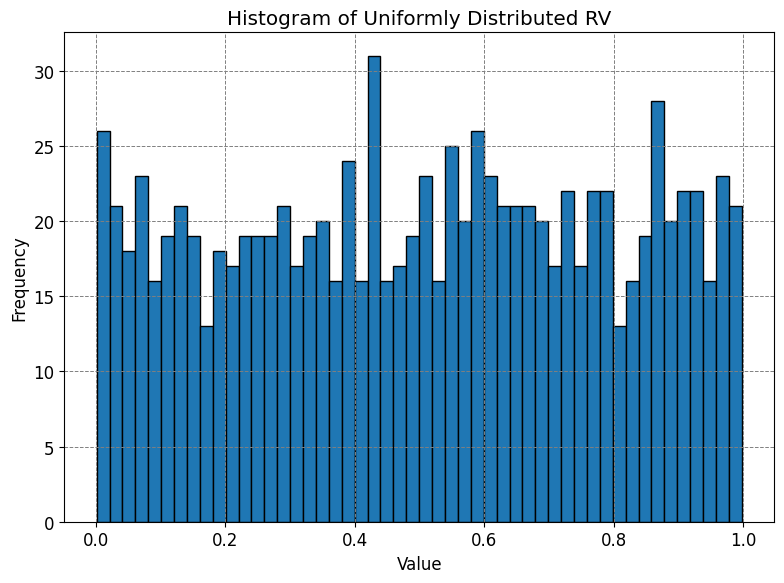

In [12]:
import random

random.seed(2019)           # Set a fixed random seed for reproducibility of random values

plt.figure(figsize=(8, 6))  # Set figure size to 8x6 inches for better readability

# Generate 1000 random values uniformly distributed between 0 and 1
rvs = [random.random() for _ in range(1000)]

plt.hist(rvs, bins=50, edgecolor='black')           # Plot a histogram of the generated random values with 50 bins
plt.title("Histogram of Uniformly Distributed RV")  # Set the title for the histogram
plt.xlabel("Value")                                 # Label for x-axis 
plt.ylabel("Frequency")                             # Label for y-axis 

plt.grid(visible=True, linestyle='--', linewidth=0.7, color='grey')  # Add grid lines for better visualization
plt.tight_layout()                                                   # Adjust the layout
plt.show()                                                           # Display the histogram

In [13]:
# Calculate the mean of the list
np.mean(rvs)

0.5054772636416909

In [14]:
# Another way
import statistics

# Calculate the mean of the list
mean_value = statistics.mean(rvs)  
mean_value

0.5054772636416909

## Median

In [16]:
np.median(rvs)

0.5136755026003803

Now, I will be changing one entry to 1,000, which is 1,000 times larger than the maximal possible value in the dataset and repeat the calculation:

In [18]:
rvs[-1] = 1000
print(f'Mean: {np.mean(rvs)}\nMedian: {np.median(rvs)}')

Mean: 1.5054701085937803
Median: 0.5150437661964872


The mean increased by roughly 1, but the median is robust.

## Mode

The mode of a set of values is the most frequent element in a set. It is evident in a
histogram plot such that it represents the peak(s).

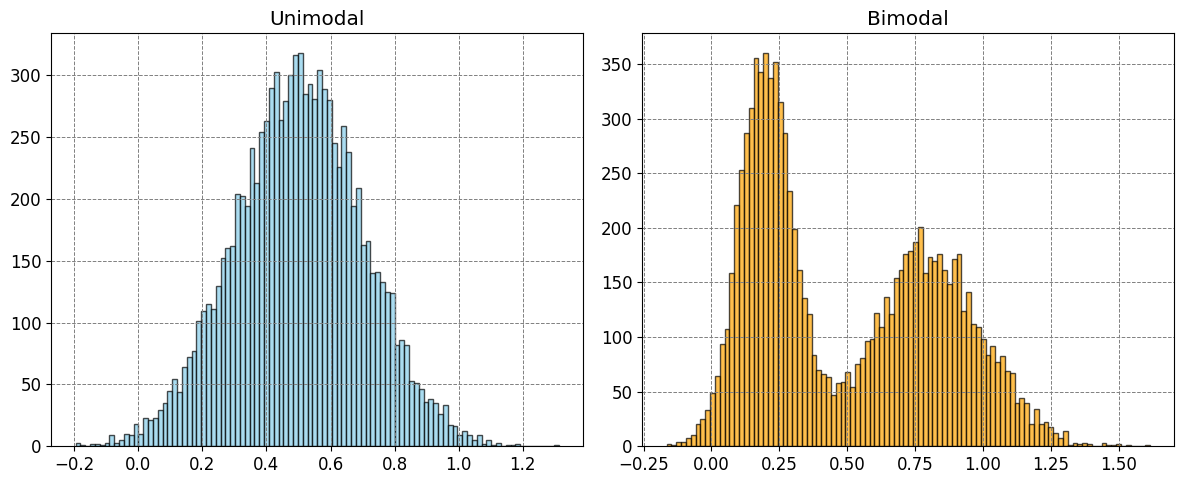

In [22]:
r1 = [random.normalvariate(0.5, 0.2) for _ in range(10000)]  # Generate 10,000 random values from a normal distribution with mean 0.5 and std dev 0.2
r2 = [random.normalvariate(0.2, 0.1) for _ in range(5000)]   # Generate 5,000 random values from a normal distribution with mean 0.2 and std dev 0.1
r3 = [random.normalvariate(0.8, 0.2) for _ in range(5000)]   # Generate 5,000 random values from a normal distribution with mean 0.8 and std dev 0.2

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 1 row and 2 columns of subplots

# Plot histogram for 'r1' on the first subplot
axes[0].hist(r1, bins=100, color='skyblue', edgecolor='black', alpha=0.7)  # Histogram with 100 bins, styled with blue color
axes[0].set_title("Unimodal")                                              # Set the title of the first subplot
axes[0].grid(visible=True, linestyle='--', linewidth=0.7, color='grey')    # Add a grid to the first subplot

# Plot histogram for the combined 'r2' and 'r3' on the second subplot
axes[1].hist(r2 + r3, bins=100, color='orange', edgecolor='black', alpha=0.7)  # Histogram with 100 bins, styled with coral color
axes[1].set_title("Bimodal")                                                   # Set the title of the second subplot
axes[1].grid(visible=True, linestyle='--', linewidth=0.7, color='grey')        # Add a grid to the second subplot

plt.tight_layout()  # Adjust the layout
plt.show()          # Display the histograms

# Numerical Variable: Variance, Standard Deviation, Quartiles and Skewness
## Variance

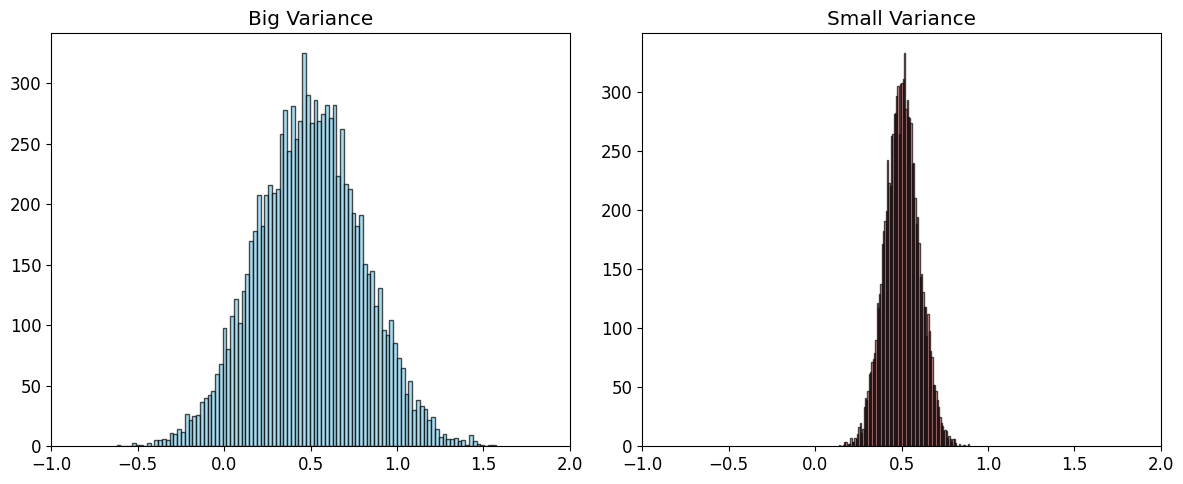

In [24]:
r1 = [random.normalvariate(0.5, 0.3) for _ in range(10000)]  # Generate 10,000 random values with mean 0.5 and standard deviation 0.3
r2 = [random.normalvariate(0.5, 0.1) for _ in range(10000)]  # Generate 10,000 random values with mean 0.5 and standard deviation 0.1

fig, axes = plt.subplots(1, 2, figsize=(12, 5))              # Create a figure with 1 row and 2 columns of subplots

# Plot histogram for 'r1' on the first subplot
axes[0].hist(r1, bins=100, color='skyblue', edgecolor='black', alpha=0.7)  # Create a histogram with 100 bins for r1
axes[0].set_xlim([-1, 2])                                                  # Set the x-axis limits to the range [-1, 2] 
axes[0].set_title("Big Variance")                                          # Add a title to the first subplot

# Plot histogram for 'r2' on the second subplot
axes[1].hist(r2, bins=100, color='lightcoral', edgecolor='black', alpha=0.7)  # Create a histogram with 100 bins for r2
axes[1].set_xlim([-1, 2])                                                     # Set the x-axis limits to the range [-1, 2]
axes[1].set_title("Small Variance")                                           # Add a title to the second subplot

plt.tight_layout()  # Adjust layout
plt.show()          # Display the plots

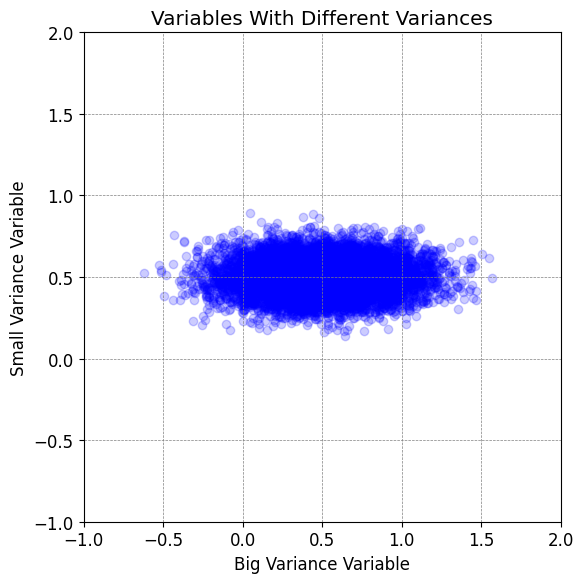

In [25]:
plt.figure(figsize=(6, 6))  # Set the figure size

plt.scatter(r1, r2, alpha=0.2, color='blue')  # Create a scatter plot with points from r1 and r2, set transparency (alpha) to 20%
plt.xlim(-1, 2)                               # Set the x-axis limits to the range [-1, 2]
plt.ylim(-1, 2)                               # Set the y-axis limits to the range [-1, 2]

plt.xlabel("Big Variance Variable")           # Label the x-axis
plt.ylabel("Small Variance Variable")         # Label the y-axis

plt.title("Variables With Different Variances")  # Set the title

plt.grid(visible=True, linestyle='--', linewidth=0.5, color='grey')  # Add a grid with dashed lines
plt.tight_layout()  # Adjust layout
plt.show()          # Display the scatter plot

## Standard Deviation

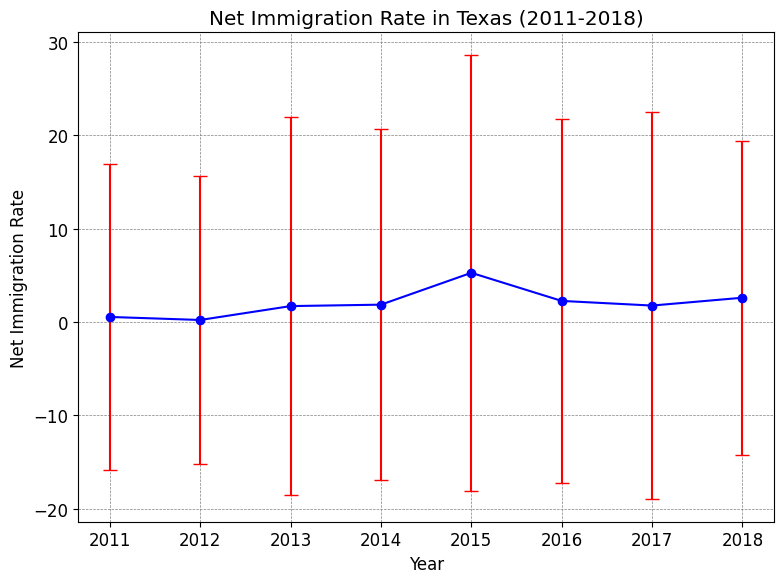

In [27]:
# Filter the dataframe to include only rows where the "State" column is "TX" and remove the first row
dfTX = df[df["State"] == "TX"].tail(-1)  

# Create a list of years from 2011 to 2018 (inclusive)
YEARS = [year for year in range(2011, 2019)]  

# Initialize empty lists to store the means and standard deviations
MEANS = []  
STDS = []

# Loop through each year from 2011 to 2018
for i in range(2011, 2019):
    year = "R_NET_MIG_" + str(i)       # Construct the column name for the given year
    MEANS.append(np.mean(dfTX[year]))  # Calculate the mean net immigration rate for the year and append to MEANS
    STDS.append(np.std(dfTX[year]))    # Calculate the standard deviation and append to STDS

# Set the figure size for the plot
plt.figure(figsize=(8, 6))  

# Create an error bar plot with years on the x-axis, means on the y-axis, and standard deviations as error bars
plt.errorbar(YEARS, MEANS, yerr=STDS, fmt='o-', color='blue', ecolor='red', capsize=5)  

plt.xlabel("Year")                                                   # Set the label for the x-axis
plt.ylabel("Net Immigration Rate")                                   # Set the label for the y-axis
plt.title("Net Immigration Rate in Texas (2011-2018)")               # Add a title to the plot
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='grey')  # Add a grid

plt.tight_layout()  # Adjust layout
plt.show()          # Display the plot

## Quartiles

In [29]:
# Calculate the 25th, 50th (median), and 75th percentiles (quantiles)
np.quantile(dfTX["R_NET_MIG_2013"], [0.25, 0.5, 0.75])

array([-7.83469971,  0.87919226,  8.84040759])

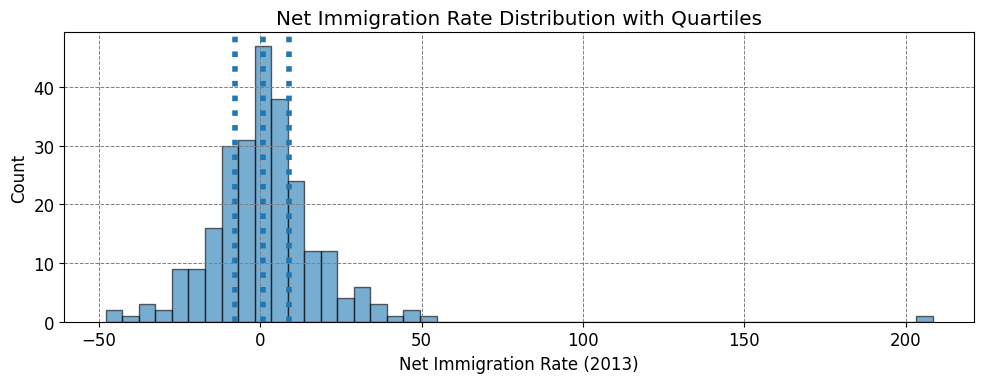

In [30]:
plt.figure(figsize=(10, 4))  # Set figure size

# Plot a histogram of the "R_NET_MIG_2013" column with 50 bins and 60% transparency
plt.hist(dfTX["R_NET_MIG_2013"], bins=50, edgecolor='black', alpha=0.6)

# Loop through each quartile (25th, 50th, 75th percentiles)
for quartile in np.quantile(dfTX["R_NET_MIG_2013"], [0.25, 0.5, 0.75]):
    plt.axvline(quartile, linestyle=':', linewidth=4)                # Add a vertical dashed line at each quartile

plt.xlabel("Net Immigration Rate (2013)")                            # Label for the x-axis
plt.ylabel("Count")                                                  # Label for the y-axis
plt.title("Net Immigration Rate Distribution with Quartiles")        # Set a title for the plot
plt.grid(visible=True, linestyle='--', linewidth=0.7, color='grey')  # Add grid lines

plt.tight_layout()  # Adjust layout
plt.show()          # Display the plot

## Skewness

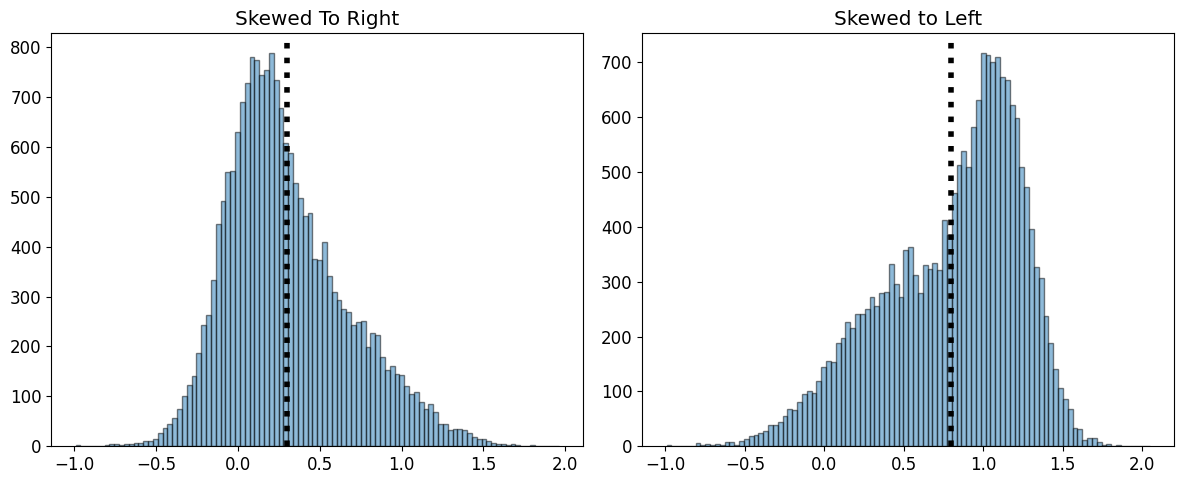

In [32]:
r1 = [random.normalvariate(0.5, 0.4) for _ in range(10000)]  # Generate 10,000 random values with mean 0.5 and std deviation 0.4
r2 = [random.normalvariate(0.1, 0.2) for _ in range(10000)]  # Generate 10,000 random values with mean 0.1 and std deviation 0.2
r3 = [random.normalvariate(1.1, 0.2) for _ in range(10000)]  # Generate 10,000 random values with mean 1.1 and std deviation 0.2

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with two side-by-side subplots

# First subplot: Histogram of combined r1 and r2
axes[0].hist(r1 + r2, bins=100, edgecolor='black', alpha=0.5)                 # Plot histogram with 100 bins and 50% transparency
axes[0].axvline(np.mean(r1 + r2), linestyle=':', color='black', linewidth=4)  # Add a vertical dashed line at the mean
axes[0].set_title("Skewed To Right")                                          # Set the title for the first subplot

# Second subplot: Histogram of combined r1 and r3
axes[1].hist(r1 + r3, bins=100, edgecolor='black', alpha=0.5)                 # Plot histogram with 100 bins and 50% transparency
axes[1].axvline(np.mean(r1 + r3), linestyle=':', color='black', linewidth=4)  # Add a vertical dashed line at the mean
axes[1].set_title("Skewed to Left")                                           # Set the title for the second subplot

plt.tight_layout()  # Adjust layout
plt.show()          # Display the histograms

# A Revisit of Outlier Detection
## Symmetric Case

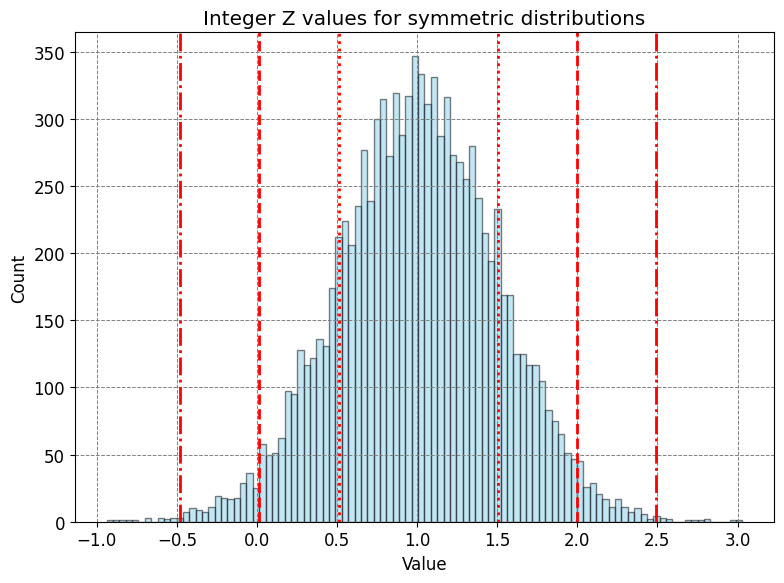

In [34]:
random.seed(2020)  # Set a seed for reproducibility of random number generation

# Generate 10,000 random values with a normal distribution (mean=1, std=0.5)
x = [random.normalvariate(1, 0.5) for _ in range(10000)]  

plt.figure(figsize=(8, 6))                                            # Set the figure size to make the plot easier to read
plt.hist(x, bins=100, alpha=0.5, color='skyblue', edgecolor='black')  # Create a histogram with 100 bins and semi-transparent bars

styles = [":", "--", "-."]  # Define different line styles for each standard deviation marker

for i in range(3):  # Iterate over the first three standard deviations (±1σ, ±2σ, ±3σ)
    
    # Add vertical lines for positive deviations (mean + n*std)
    plt.axvline(np.mean(x) + (i+1)*np.std(x),  # Location: mean + n*std
                linestyle=styles[i],           # Use the corresponding line style
                linewidth=2,                   # Set line width for visibility
                color='red')                   # Use red for better contrast
    
    # Add vertical lines for negative deviations (mean - n*std)
    plt.axvline(np.mean(x) - (i+1)*np.std(x),  # Location: mean - n*std
                linestyle=styles[i],           # Use the corresponding line style
                linewidth=2,                   # Set line width for visibility
                color='red')                   # Use red for better contrast

plt.title("Integer Z values for symmetric distributions")  # Add a title to the plot
plt.xlabel("Value")                                        # Label the x-axis
plt.ylabel("Count")                                        # Label the y-axis

plt.grid(visible=True, linestyle='--', linewidth=0.7, color='grey')  # Add grid lines for readability
plt.tight_layout()  # Adjust layout
plt.show()          # Display the histogram

## Asymmetric Case

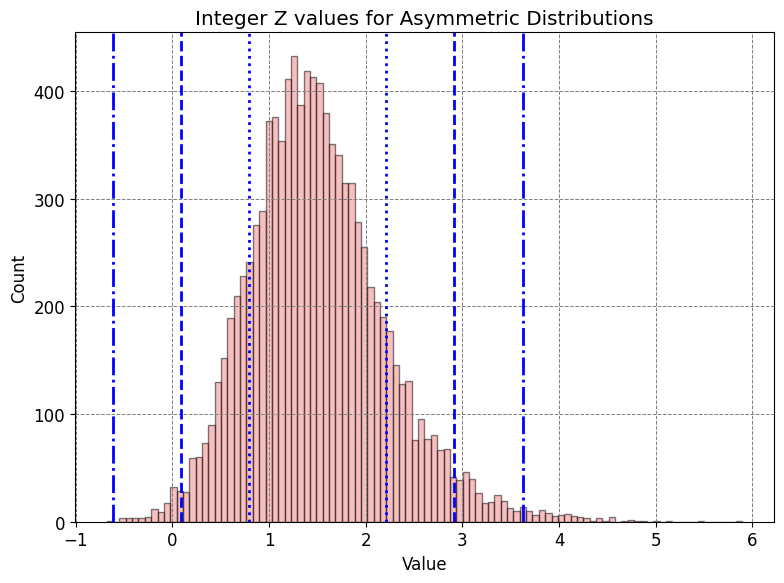

In [36]:
random.seed(2020)  # Set the random seed for reproducibility

# Generate 10,000 random values by combining a normal distribution (mean=1, std=0.5) 
# and an exponential distribution (lambda=2, scale=1/2)
x = [random.normalvariate(1, 0.5) + random.expovariate(2) for _ in range(10000)]

plt.figure(figsize=(8, 6))  # Set the figure size for better visualization
plt.hist(x, bins=100, alpha=0.5, color='lightcoral', edgecolor='black')  # Create a histogram with semi-transparent bars and outlined edges

styles = [":", "--", "-."]  # Define line styles for standard deviation markers

for i in range(3):  # Iterate over the first three standard deviations
    
    # Plot vertical lines for positive deviations (mean + n*std)
    plt.axvline(np.mean(x) + (i+1)*np.std(x),  # Calculate the location: mean + n*std
                linestyle=styles[i],           # Use the corresponding line style
                linewidth=2,                   # Set line width for visibility
                color='blue')                  # Set line color to blue
    
    # Plot vertical lines for negative deviations (mean - n*std)
    plt.axvline(np.mean(x) - (i+1)*np.std(x),  # Calculate the location: mean - n*std
                linestyle=styles[i],           # Use the corresponding line style
                linewidth=2,                   # Set line width for visibility
                color='blue')                  # Set line color to blue

plt.title("Integer Z values for Asymmetric Distributions")  # Add a title describing the plot
plt.xlabel("Value")  # Label the x-axis to describe the variable being plotted
plt.ylabel("Count")  # Label the y-axis to describe the frequency count of occurrences

plt.grid(visible=True, linestyle='--', linewidth=0.7, color='grey')  # Add grid lines
plt.tight_layout()  # Adjust layout
plt.show()          # Display the histogram

# Categorical Variables and Categorization
## Frequencies and Proportions

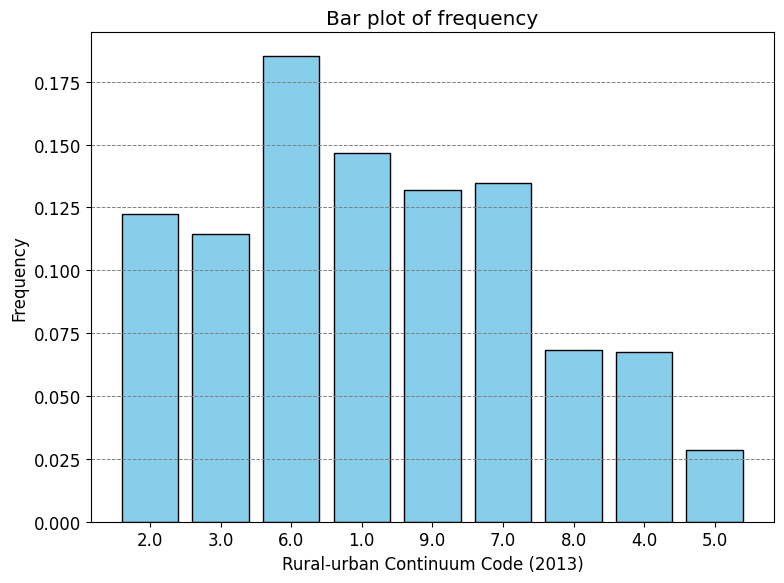

In [38]:
from collections import Counter 

# Count occurrences of each unique value in the column, excluding NaN
counter = Counter(df["Rural-urban_Continuum Code_2013"].dropna())  

labels = []  # Initialize a list to store unique labels (categories)
x = []       # Initialize a list to store the count or frequency of each category

# Loop through the counter items (key-value pairs: category and its count)
for key, val in counter.items():
    labels.append(str(key))  # Append the category (converted to string for labeling) to labels
    x.append(val)            # Append the count of occurrences to x

x = np.array(x) / sum(x)     # Normalize counts to calculate frequencies (relative values)

plt.figure(figsize=(8, 6))  # Set figure size to 8x6 inches
plt.bar(labels, x, color='skyblue', edgecolor='black')  # Create a bar plot with colored bars and outlined edges
plt.title("Bar plot of frequency")                      # Set the title of the bar plot
plt.xlabel("Rural-urban Continuum Code (2013)")         # Label for the x-axis
plt.ylabel("Frequency")                                 # Label for the y-axis

plt.grid(axis='y', linestyle='--', linewidth=0.7, color='grey')  # Add grid lines on the y-axis for better readability
plt.tight_layout()  # Adjust layout
plt.show()          # Display the bar plot

In [39]:
# counter = Counter(df["Rural-urban_Continuum Code_2013"].dropna())
counter

Counter({6.0: 597,
         1.0: 472,
         7.0: 434,
         9.0: 425,
         2.0: 394,
         3.0: 369,
         8.0: 220,
         4.0: 217,
         5.0: 92})

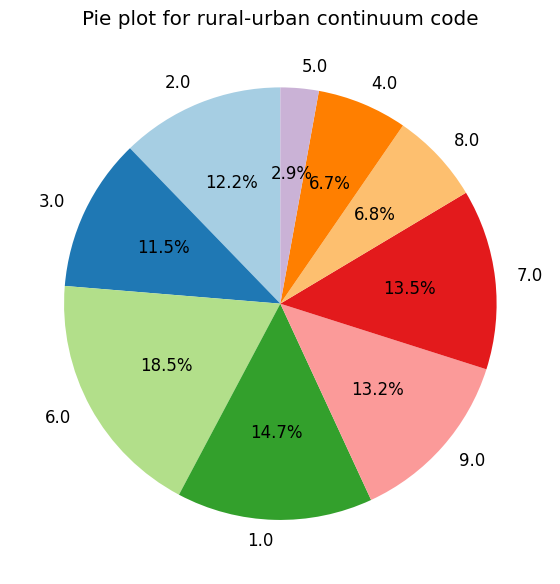

In [40]:
plt.figure(figsize=(6, 6))       # Set figure size to create a square-shaped plot

# Create a pie chart using the normalized frequencies (x) and corresponding labels
plt.pie(
    x=x,                         # Values to display in the pie chart (frequencies)
    labels=labels,               # Labels corresponding to each slice of the pie
    autopct='%1.1f%%',           # Display percentage values inside the slices with 1 decimal precision
    startangle=90,               # Start the first slice at the top (90 degrees)
    colors=plt.cm.Paired.colors  # Use a colormap for diverse slice colors
)

plt.title("Pie plot for rural-urban continuum code")  # Set the title of the pie chart
plt.tight_layout()  # Adjust layout
plt.show()          # Display the pie chart

## Transform Continuous Variable to Categorical Variable

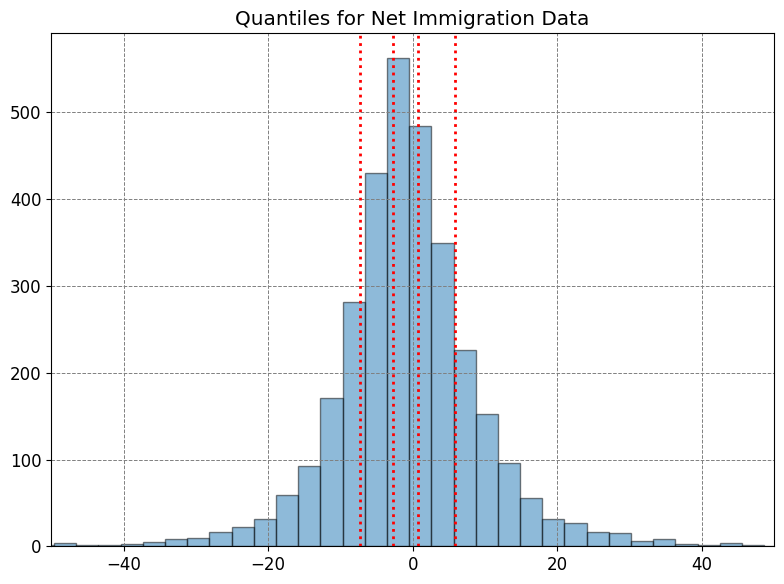

In [42]:
# Extract the "R_NET_MIG_2013" column, dropping NaN values
series = df["R_NET_MIG_2013"].dropna()

# Calculate quantiles at 20%, 40%, 60%, and 80% intervals
quantiles = np.quantile(series, [0.2 * i for i in range(1, 5)])

plt.figure(figsize=(8, 6))  # Set the figure size for the histogram

# Plot the histogram of the series with 100 bins and a 50% transparency
plt.hist(series, bins=100, alpha=0.5, edgecolor='black')  
plt.xlim(-50, 50)           # Set the limits of the x-axis

# Add vertical lines at each quantile value
for i in range(len(quantiles)):
    plt.axvline(
        quantiles[i],       # Position of the vertical line
        linestyle=":",      # Set the line style to dotted
        linewidth=2,        # Set the line width to 2
        color='red'         # Set the line color to red
    )

# Add a title to the histogram
plt.title("Quantiles for Net Immigration Data")

plt.grid(visible=True, linestyle='--', linewidth=0.7, color='grey')  # Add grid lines
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()          # Display the histogram with quantile lines

# Bivariate Descriptive Statistics
## Covariance

### Formula:

$$
\text{Corr}(X, Y) = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$

Where:
- $\text{Cov}(X, Y)$ is the covariance.
- $\sigma_X$ and $\sigma_Y$ are the standard deviations of \(X\) and \(Y\).

In [45]:
# Covariance

corrs = dfTX[['R_NET_MIG_2011',
       'R_NET_MIG_2012', 'R_NET_MIG_2013', 'R_NET_MIG_2014', 'R_NET_MIG_2015',
       'R_NET_MIG_2016', 'R_NET_MIG_2017', 'R_NET_MIG_2018']].dropna().corr()
corrs

,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018
R_NET_MIG_2011,1.000000,-0.025355,0.476505,-0.021194,0.407675,0.030318,0.344111,0.492326
R_NET_MIG_2012,-0.025355,1.000000,0.028037,0.555593,-0.027442,0.048258,-0.187224,0.049451
R_NET_MIG_2013,0.476505,0.028037,1.000000,-0.007720,0.713877,0.024169,0.310188,0.376498
R_NET_MIG_2014,-0.021194,0.555593,-0.007720,1.000000,-0.226211,0.177007,-0.148383,0.185914
R_NET_MIG_2015,0.407675,-0.027442,0.713877,-0.226211,1.000000,0.223869,0.568450,0.476637
R_NET_MIG_2016,0.030318,0.048258,0.024169,0.177007,0.223869,1.000000,0.595684,0.443691
R_NET_MIG_2017,0.344111,-0.187224,0.310188,-0.148383,0.568450,0.595684,1.000000,0.596495
R_NET_MIG_2018,0.492326,0.049451,0.376498,0.185914,0.476637,0.443691,0.596495,1.000000


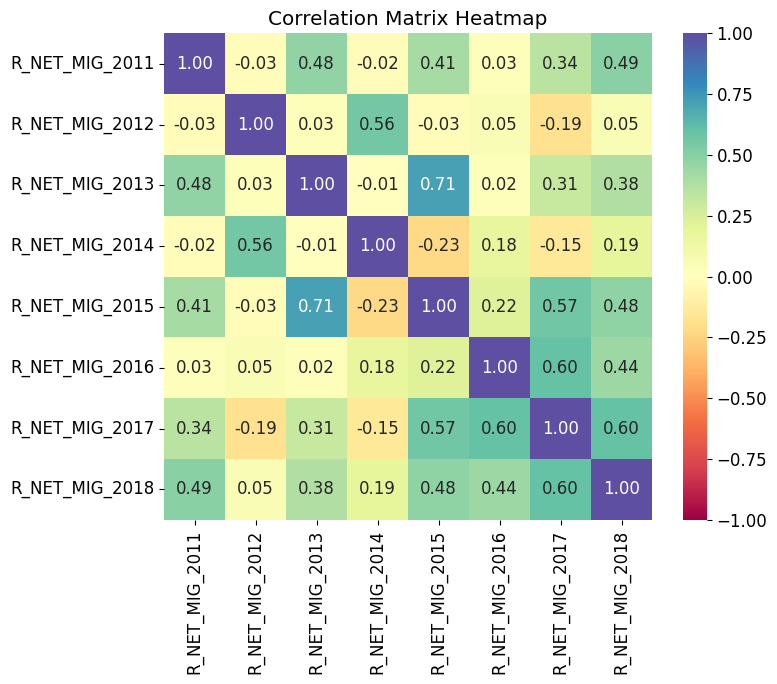

In [46]:
# Import necessary libraries
import seaborn as sns  # Import seaborn for creating the heatmap

# Create a figure and axis with dimensions 10x10 inches for better readability
fig, ax = plt.subplots(figsize=(8, 7))

# Compute the correlation matrix for your selected stocks (make sure 'corrs' is defined)
# corrs = your_dataframe.corr()  # Uncomment and replace 'your_dataframe' with your actual DataFrame

# Generate a heatmap to display the correlation matrix of selected stocks
sns.heatmap(
    corrs,                # Use the computed correlation matrix for the heatmap
    fmt=".2f",            # Format the annotation text to 2 decimal places
    annot=True,           # Annotate each cell in the heatmap with its correlation value
    ax=ax,                # Use the specified axis for the plot
    cmap="Spectral",      # Set the color palette to 'Spectral' for a visually appealing gradient
    vmin=-1,              # Set the minimum value of the color scale to -1 (strong negative correlation)
    vmax=1                # Set the maximum value of the color scale to 1 (strong positive correlation)
)

plt.title("Correlation Matrix Heatmap")  # Add a title to the heatmap for context
plt.tight_layout()                       # Adjust layout to minimize overlap and improve visual presentation
plt.show()                               # Display the heatmap

## Cross-tabulation

In [48]:
weather = ["rainy","sunny","rainy","windy","windy","sunny","rainy","windy","sunny","rainy","sunny","windy","windy"]

golfing = ["Yes","Yes","No","No","Yes","Yes","No","No","Yes","No","Yes","No","No"]

dfGolf = pd.DataFrame({"weather":weather,"golfing":golfing})

dfGolf

,weather,golfing
0,rainy,Yes
1,sunny,Yes
2,rainy,No
3,windy,No
4,windy,Yes
5,sunny,Yes
6,rainy,No
7,windy,No
8,sunny,Yes
9,rainy,No


In [49]:
pd.crosstab(dfGolf.weather, dfGolf.golfing, margins=True)

golfing,No,Yes,All
weather,,,
rainy,3,1,4
sunny,0,4,4
windy,4,1,5
All,7,6,13
